In [140]:
import numpy as np 
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse

In [141]:
#read csv files, there is no ID columns 
X=pd.read_csv("train_features.csv")
y=pd.read_csv("train_targets.csv")
test=pd.read_csv("test_features.csv")

In [142]:
X.head()

,age,sex,bmi,children,smoker,region
0,40,female,25.460,1,no,northeast
1,18,male,39.140,0,no,northeast
2,55,female,29.700,2,no,southwest
3,64,female,35.970,0,no,southeast
4,34,male,21.375,0,no,northeast


In [143]:
X.tail()

,age,sex,bmi,children,smoker,region
895,50,male,26.41,0,no,northwest
896,23,female,32.78,2,yes,southeast
897,62,female,26.29,0,yes,southeast
898,63,male,21.66,1,no,northwest
899,18,female,21.66,0,yes,northeast


In [144]:
X.shape

(900, 6)

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       900 non-null    int64  
 1   sex       900 non-null    object 
 2   bmi       900 non-null    float64
 3   children  900 non-null    int64  
 4   smoker    900 non-null    object 
 5   region    900 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 42.3+ KB


In [146]:
#check null values
X.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [147]:
#overall statistics
X.describe()

,age,bmi,children
count,900.000000,900.000000,900.000000
mean,39.147778,30.692950,1.094444
std,13.920454,6.120561,1.208504
min,18.000000,15.960000,0.000000
25%,27.000000,26.400000,0.000000
50%,39.000000,30.302500,1.000000
75%,51.000000,34.800000,2.000000
max,64.000000,53.130000,5.000000


In [148]:
X['sex'].unique()
X['smoker'].unique()
X['region'].unique()

array(['northeast', 'southwest', 'southeast', 'northwest'], dtype=object)

In [149]:
#convert objects to numerical values sex, smoker, and region 
#preprocessing
X['sex']=X['sex'].map({'female':0, 'male':1})
X['smoker']=X['smoker'].map({'no':0, 'yes':1})
X['region']=X['region'].map({'northeast':0, 'southwest':1,'southeast':2, 'northwest':3})


split data intrp training and testing sets
train model on training set 
test model on testing set

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
#model training 
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor()

In [159]:
y_pred1 = rf.predict(X_test)
y_pred2 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test.values.flatten(),'rf':y_pred1,'gr':y_pred2})

In [160]:
df1

,Actual,rf,gr
0,12233.82800,12967.197609,15272.924939
1,4428.88785,13883.644785,7693.051392
2,37133.89820,37545.576768,38119.251057
3,7749.15640,7578.357038,9947.358685
4,4149.73600,7759.911539,5339.125885
...,...,...,...
175,27808.72510,28124.579091,27391.643586
176,6356.27070,14833.381711,7643.484655
177,8782.46900,11980.246553,11046.355330
178,18157.87600,6562.814266,7249.466026


In [161]:
import matplotlib.pyplot as plt

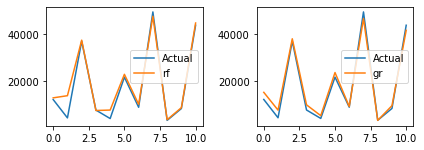

In [162]:
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [165]:
gr = GradientBoostingRegressor()
gr.fit(X,y.ravel())

GradientBoostingRegressor()

In [188]:
import time
from sklearn.ensemble import GradientBoostingRegressor
def K5Fold(X, y):
    mseList = [] # list to keep MSEs of each fold
    startTime = time.time() # start time
    kFold = KFold(n_splits=5) # 5-fold CV
    foldNo = 1
    for train_index, test_index in kFold.split(X):
        print("Fold: ", foldNo) # printing fold number
        model = GradientBoostingRegressor() # training the model
        model.fit(X,y.ravel())
        prediction = predict(X_test,model) # predicting the test samples
        FMse = mse(prediction.flatten(), y_test.to_numpy().flatten()) # calculating MSE of current fold
        print("MSE Result: ", FMse)
        print()
        mseList.append(FMse) # appending fold mse to mse list
        foldNo += 1
    print("Total time passed in 5-Fold CV: ","{:.2f}".format((time.time()-startTime))) # printing total time passed
    print("Mean of MSEs:",np.mean(mseList)) # printing the mean of all mses of folds
K5Fold(X,y)
print("Training with samples and predicting test samples")
model =GradientBoostingRegressor() # training the model
model.fit(X,y.ravel()) # training model for prediction
prediction = predict(X_test,model) # predicting using test data
write_output("predictions.csv", prediction.flatten()) # writing predictions to csv file
print("Done.")

Fold:  1
MSE Result:  24935125.412036292

Fold:  2
MSE Result:  25072925.004025057

Fold:  3
MSE Result:  25124939.641964562

Fold:  4
MSE Result:  24774493.11722447

Fold:  5
MSE Result:  25228112.633797947

Total time passed in 5-Fold CV:  0.25
Mean of MSEs: 25027119.161809664
Training with samples and predicting test samples
Done.


Prediction

In [181]:
def predict(test, model):
    predictions = model.predict(X_test) # predicting the data using model
    return predictions

In [170]:
# 5Fold CV gives 5 different model and 5 different model provides 5 different value for one component
# For reaching better solution we take average of them
def get_average(values):
  average_for_out = np.zeros((80, 595))
  for i in range(5):
    average_for_out += np.array(values[i])
  average_for_out = np.true_divide(average_for_out, 5)
  return average_for_out

In [186]:
def write_output(filename,predictions):
    with open(filename, mode='w', newline='') as output_file: # opening file
        output_writer = csv.writer(output_file, delimiter=',') # csv writer
        output_writer.writerow(["ID", "predicted"]) # writning header
        for i in range(len(predictions)):
            output_writer.writerow([i, predictions[i]])